# Loan Prediction EDA

Loan eligibility process based on customer information

### About the company 

"Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan."

### Problem statement 

It's a binary classification problem where we have to predict whether the loan would be approved or not.

### Hypothesis Generation 

Here is a list of all the many possible factors that can affect (impact) the outcome :
- The salary of the applicant: the higher the income, the greater his chances of getting the loan.
- Loan amount: the lower the amount, the greater his chances of getting the loan.
- Credit history: if applicants have repayed their previous debts, it should improve the credit score.
- Loan term: Short-term loan and smaller amount should positively impact the loan approval 
- EMI:Equated Monthly Instalment (EMI) is a fixed monthly payment, part of the equally divided repayments, used to clear off your outstanding loan. Lower the EMI, higher the chances of loan approval 

### Loading modules

In [1]:
import pandas as pd 
import pandas_profiling
import numpy as np                     # For mathematical calculations 
import seaborn as sns  
sns.set()# For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import sklearn
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

### Data 

We have 2 .csv files: 
- Train file: will be used for training our model. Contains independent variables + the target
- Test file: contains only the independant variables. We will apply the modele to predict the target for these data. 

### Reading the data 

In [272]:
train = pd.read_csv("train_ctrUa4K.csv") 
test = pd.read_csv("test_lAUu6dG.csv")

Let's make a copy of the files to keep the original datasets unchanged 

In [273]:
train_original=train.copy() 
test_original=test.copy()


### Exploratory Data Analysis EDA

Let's check the features first 

In [298]:
train.profile_report()

In [20]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
len(train.columns)
# We have 12 independant variables, "Loan_Status" is the target, whether the loan is approved or not

13

In [23]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [24]:
# Same here for the test dataset (excepting the target)
# The model will be built using the train data 

In [31]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [28]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Univariate Analysis 

It's the analysis of each variable individually

### Categorical features

#### The target "Loan_Status"

We will take a look at frequency table, percentage distribution and bar plot

#### Frequency table 

In [33]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

To print proportions instead of numbers, we can set "normalize" to True

In [34]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

68.7% of applicants in the dataset got the loan 

#### Bar plot

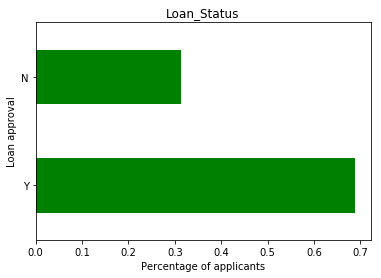

In [131]:
plt.figure(1)
train['Loan_Status'].value_counts(normalize=True).plot.barh(color='green', title= 'Loan_Status')
plt.xlabel('Percentage of applicants')
plt.ylabel('Loan approval')
plt.show()

#### Independant features (Categorical) 

We will look at the bar plots of these features "Gender", "Married","Self employed","Credit_History"

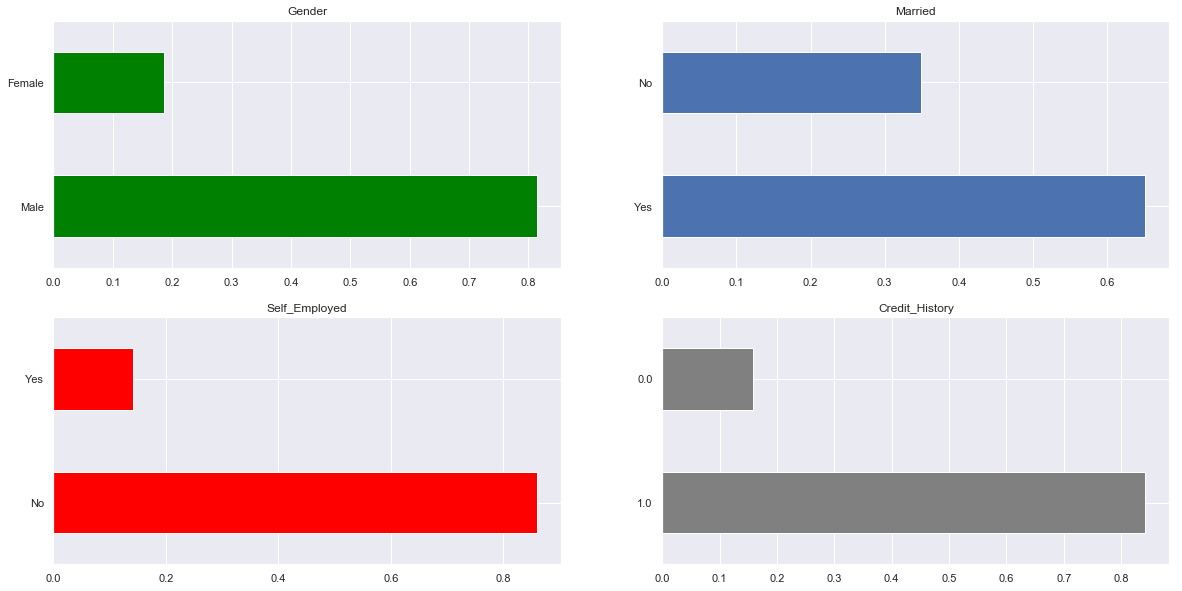

In [277]:
plt.figure(2) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.barh(figsize=(20,10),color='green', title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.barh(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.barh(title= 'Self_Employed',color='red') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.barh(title= 'Credit_History', color='grey') 
plt.show()

- 80% of the applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% of the applicants in the dataset are self employed.
- Around 85% of the applicants have repaid their debts.

#### Independant features (Ordinal)

Let's visualize ordinal features: "Dependents", "Education","Property_Area"

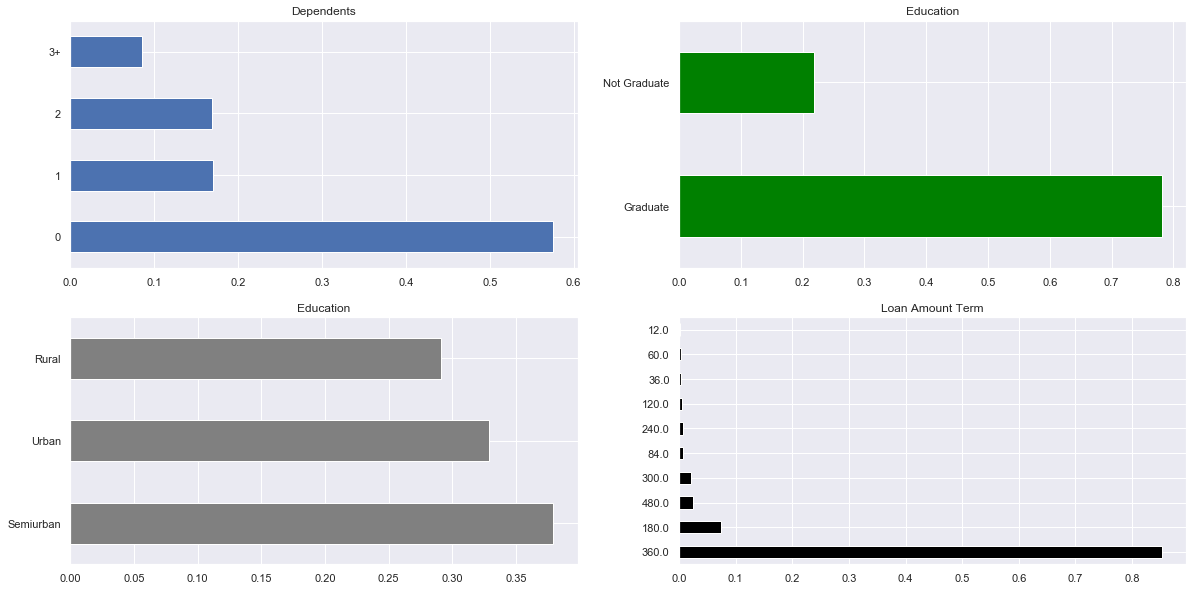

In [278]:
plt.figure(3) 
plt.subplot(221)
train['Dependents'].value_counts(normalize=True).plot.barh(figsize=(20,10),title= 'Dependents') 
plt.subplot(222) 
train['Education'].value_counts(normalize=True).plot.barh(title= 'Education', color='green')
plt.subplot(223) 
train['Property_Area'].value_counts(normalize=True).plot.barh(title= 'Education', color='grey')
plt.subplot(224) 
train['Loan_Amount_Term'].value_counts(normalize=True).plot.barh(title= 'Loan Amount Term', color='black') 

plt.show()

- Around 60% of the applicants don't have any dependents 
- Around 80% of the applicants are graduate
- Around 40% of the applicants are from Semiurban area
- For most of applicants, the loan term is 360 months

#### Independant features (numerical)

Let's visualize the numerical variables "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term". We will take a look the density plot ( distplot and boxplot)

#### Applicant Income

<Figure size 432x288 with 0 Axes>

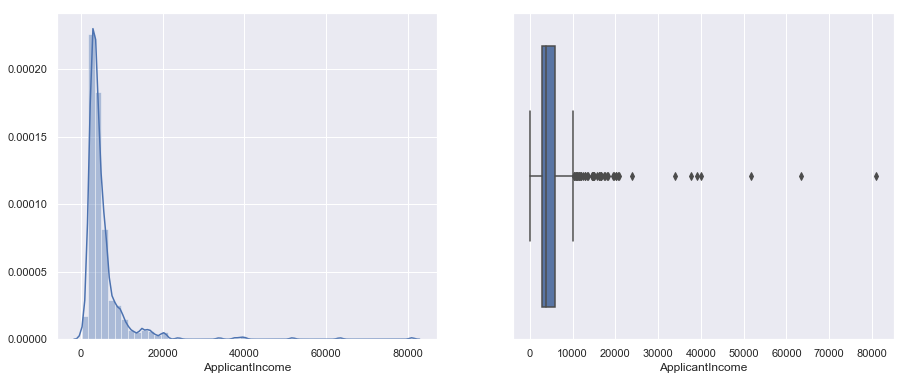

In [279]:
plt.figure(4) 
plt.subplots(figsize=(15,6))
plt.subplot(121) 
sns.distplot(train['ApplicantIncome'],kde=True) 
plt.subplot(122 ) 
sns.boxplot(train['ApplicantIncome'])
#train['ApplicantIncome'].plot.box(figsize=(15,6)) 
plt.show()

Applicant income is not normally distributed (distribution towards left, skewed)
There are also a lot of outliers in the boxplot. This is because there is a big difference between incomes, and there are applicants with very high incomes.

#### Coapplicant income

<Figure size 432x288 with 0 Axes>

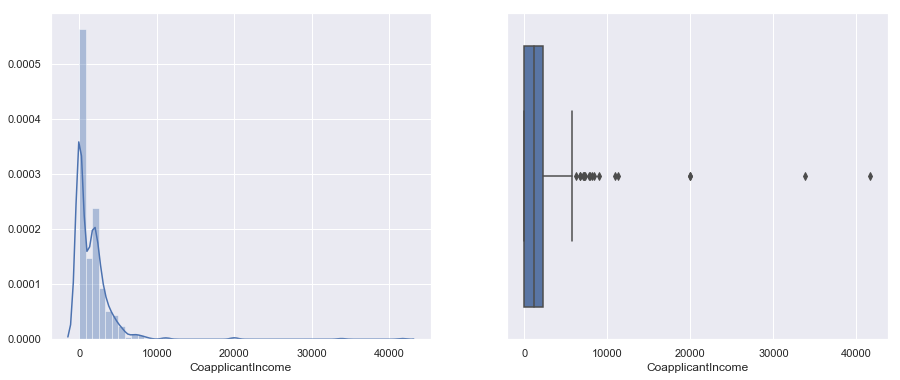

In [227]:
plt.figure(5) 
plt.subplots(figsize=(15,6))
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122) 
sns.boxplot(train['CoapplicantIncome'])
#train['CoapplicantIncome'].plot.box(figsize=(15,6)) 
plt.show()

We can see the same distribution here, but we notice that most of coapplicant incomes are 0 there are a lot of outliers. This can be related to the fact that there are applicant without coapplicant.

#### LoanAmount

<Figure size 432x288 with 0 Axes>

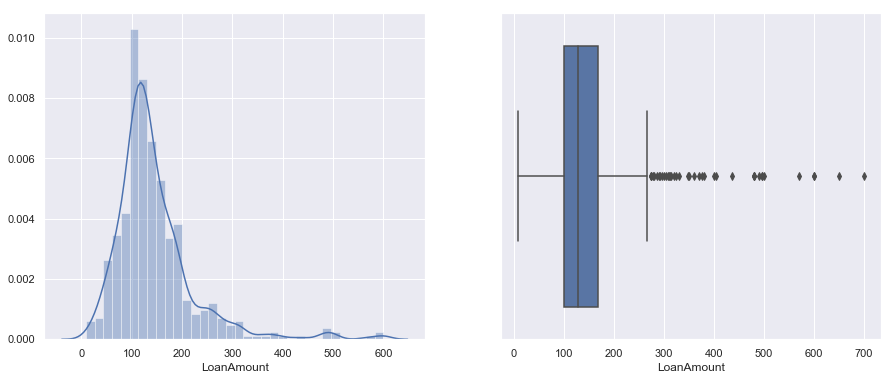

In [280]:
# This features contains NANs, we will drop them and store them in a temporary dataframe

plt.figure(6) 
plt.subplots(figsize=(15,6))
plt.subplot(121) 
df=train.dropna() 
sns.distplot(df['LoanAmount']); 
plt.subplot(122) 
sns.boxplot(train['LoanAmount'])
#train['LoanAmount'].plot.box(figsize=(15,6)) 
plt.show()

It's normally distributed but there are a lot of outliers.

### Bivariate Analysis 

So now the question is how well each feature correlate with the target Loan Status => Bivariate Analysis

According to the previous hypothesis, loan approval is affected by Applicant income, Loan amount, Credit history, Loan amount term. 

#### Categorical variables vs the Target

In [285]:
# Crosstabs
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])


<Figure size 432x288 with 0 Axes>

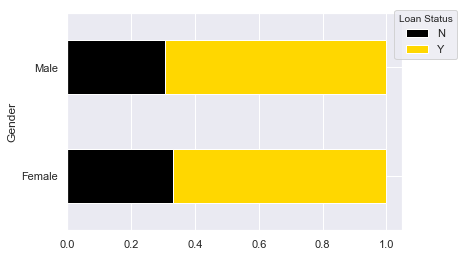

The proportion of male and female applicants is more or less same for both approved and unapproved loans.


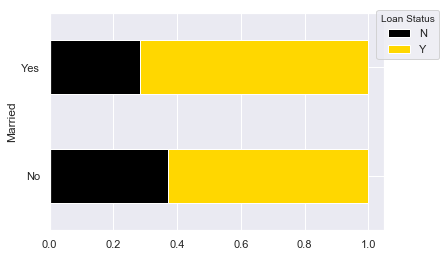

The proportion of married applicants is higher for the approved loans.


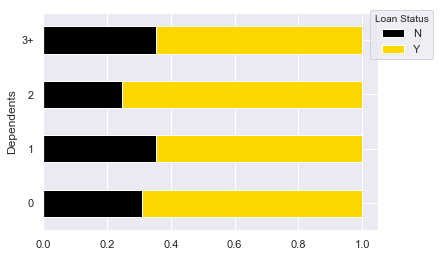

The proportion of applicants with 1 or 3+ dependents is similar for both approved and unapproved loans.


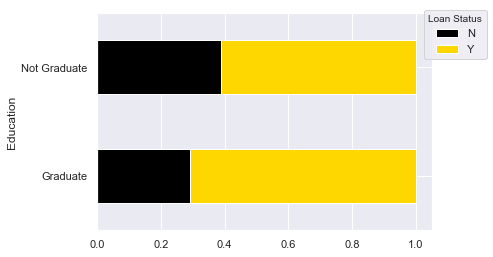

The proportion of graduate applicants is higher for the approved loans.


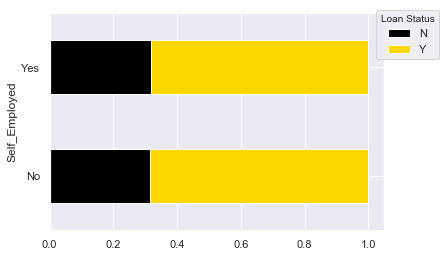

The proportion of employed and self employed applicants is more or less same for both approved and unapproved loans.


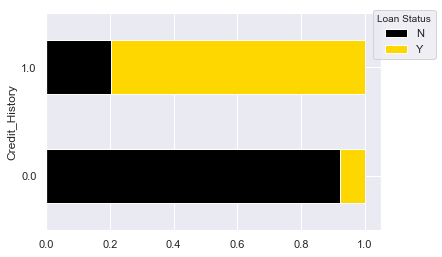

The proportion of applicants who repayed their previous debts, is higher for approved loans.


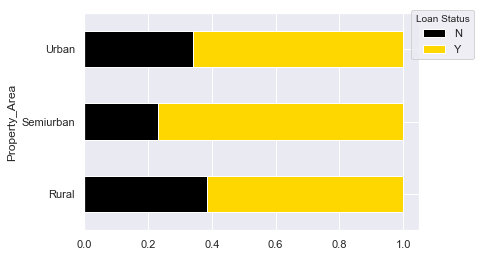

The proportion of applicants from semiurban area is higher for approved loans.


In [286]:
plt.figure(7) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True,color=['black','gold'] ).legend(loc='center', bbox_to_anchor=(1.07,0.9), title='Loan Status')
plt.show()
print('The proportion of male and female applicants is more or less same for both approved and unapproved loans.')
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True,color=['black','gold'] ).legend(loc='center', bbox_to_anchor=(1.07,0.9),title='Loan Status')
plt.show()
print('The proportion of married applicants is higher for the approved loans.')
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True, color=['black','gold']).legend(loc='center', bbox_to_anchor=(1.07,0.9),title='Loan Status') 
plt.show()
print('The proportion of applicants with 1 or 3+ dependents is similar for both approved and unapproved loans.')
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True, color=['black','gold']).legend(loc='center', bbox_to_anchor=(1.07,0.9),title='Loan Status')
plt.show()
print('The proportion of graduate applicants is higher for the approved loans.')
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True, color=['black','gold']).legend(loc='center', bbox_to_anchor=(1.07,0.9),title='Loan Status')
plt.show()
print('The proportion of employed and self employed applicants is more or less same for both approved and unapproved loans.')
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True, color=['black','gold']).legend(loc='center', bbox_to_anchor=(1.07,0.9),title='Loan Status')
plt.show() 
print('The proportion of applicants who repayed their previous debts, is higher for approved loans.')
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True,color=['black','gold']).legend(loc='center', bbox_to_anchor=(1.07,0.9),title='Loan Status')
plt.show()
print('The proportion of applicants from semiurban area is higher for approved loans.')


#### Numerical variables vs target

#### Applicant income

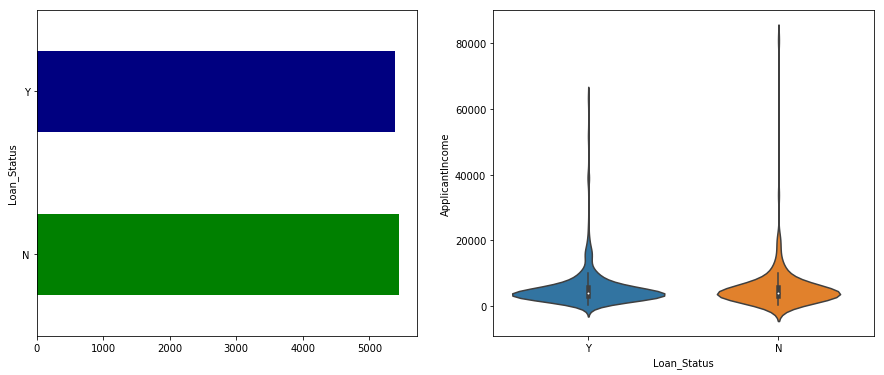

In [212]:
plt.figure(8) 
plt.subplot(121) 
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.barh(figsize=(15,6), color=['green','navy'])
plt.subplot(122) 
sns.violinplot(x = "Loan_Status", y = "ApplicantIncome", data = train)
plt.show()



There is no difference in the mean of income applicant for both approved and unapproved loans 

So we will split the incomes into 3 categories: [Low, Medium, High]

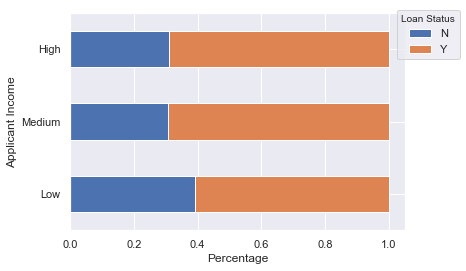

In [241]:
values=[0,2000,5000,81000] 
categories=['Low','Medium', 'High'] 
train['Income_cat']=pd.cut(train['ApplicantIncome'],values,labels=categories)

Income_cat=pd.crosstab(train['Income_cat'],train['Loan_Status']) 
Income_cat.div(Income_cat.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True).legend(loc='center', bbox_to_anchor=(1.07,0.9),title='Loan Status')
plt.xlabel('Percentage') 
P = plt.ylabel('Applicant Income')


We notice that the applicants with low income have less chance to get a loan. 

#### Coapplicant income

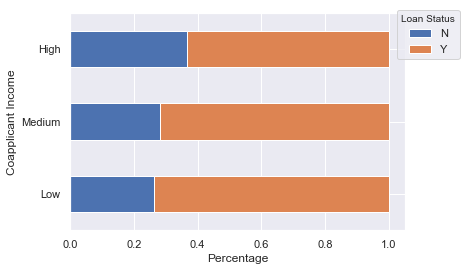

In [242]:
train['coIncome_cat']=pd.cut(train['CoapplicantIncome'],values,labels=categories)

Income_cat=pd.crosstab(train['coIncome_cat'],train['Loan_Status']) 
Income_cat.div(Income_cat.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True).legend(loc='center', bbox_to_anchor=(1.07,0.9),title='Loan Status')
plt.xlabel('Percentage') 
P = plt.ylabel('Coapplicant Income')


Here we notice that coapplicant with high income have less chance of loan approval, wich doesn't seem right. It can be due to the fact that there are applicants without any coapplicant. 
To cope with this, we can analyze the total income "ApplicantIncome"+ "CoapplicantIncome"

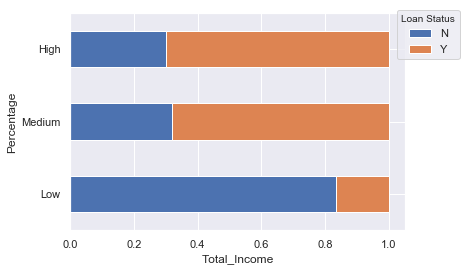

In [262]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
train['Total_Income_bin']=pd.cut(train['Total_Income'],values,labels=categories)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True).legend(loc='center', bbox_to_anchor=(1.07,0.9),title='Loan Status')
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')



Proportion of approved loans for applicants having low Total_Income is less than applicants with medium and high income.

#### Loan amount

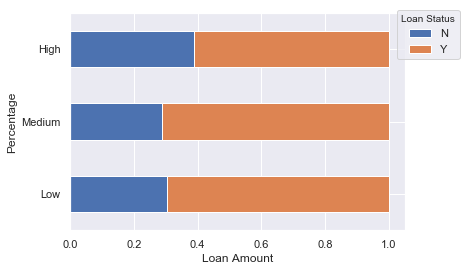

In [269]:

bins=[8,100,200,700] 
group=['Low','Medium','High'] 
train['LoanAmount_cat']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_cat=pd.crosstab(train['LoanAmount_cat'],train['Loan_Status']) 
LoanAmount_cat.div(LoanAmount_cat.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True).legend(loc='center', bbox_to_anchor=(1.07,0.9),title='Loan Status')
plt.xlabel('Loan Amount') 
P = plt.ylabel('Percentage')


Proportion of approved loans is higher for low and medium Loan Amount which supports hour hypothesis.

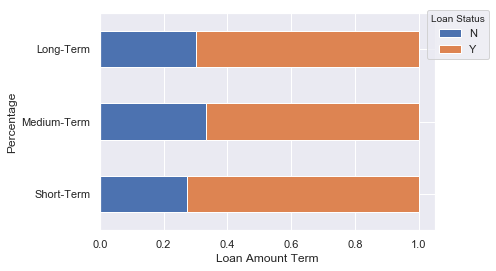

In [294]:
bins=[12,150,250,360] 
group=['Short-Term','Medium-Term','Long-Term'] 
train['LoanAmountTerm_cat']=pd.cut(train['Loan_Amount_Term'],bins,labels=group)

LoanAmount_cat=pd.crosstab(train['LoanAmountTerm_cat'],train['Loan_Status']) 
LoanAmount_cat.div(LoanAmount_cat.sum(1).astype(float), axis=0).plot(kind="barh", stacked=True).legend(loc='center', bbox_to_anchor=(1.07,0.9),title='Loan Status')
plt.xlabel('Loan Amount Term') 
P = plt.ylabel('Percentage')


Proportion of approved loans is higher for short term loan which supports hour hypothesis.

In [296]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

#### EDA Observations :

#### Univariate Analysis
####  Categorical + Ordinal features 
- 68.7% of applicants in the dataset got the loan 
- 80% of the applicants in the dataset are male.
- Around 65% of the applicants in the dataset are married.
- Around 15% of the applicants in the dataset are self employed.
- Around 85% of the applicants have repaid their debts.
- Around 60% of the applicants don't have any dependents
- Around 80% of the applicants are graduate
- Around 40% of the applicants are from Semiurban area
- For most of applicants, the loan term is 360 months
####  Numerical features 
- Applicant income and Coapplicant income are not normally distributed + outliers 
- Loan Amount is normally distributed + lot of outliers
####  Bivariate Analysis
- How well each feature correlate with the target Loan Status
####  Categorical/ordinal variables vs target
- The proportion of male and female applicants is more or less same for both approved and unapproved loans.
- The proportion of married applicants is higher for the approved loans.
- The proportion of applicants with 1 or 3+ dependents is similar for both approved and unapproved loans.
- The proportion of graduate applicants is higher for the approved loans.
- The proportion of employed and self employed applicants is more or less same for both approved and unapproved loans.
- The proportion of applicants who repayed their previous debts, is higher for approved loans.
- The proportion of applicants from semiurban area is higher for approved loans.
#### Numerical variables vs target 
- The applicants with low income have less chance to get a loan. 
- Proportion of approved loans for applicants having low Total_Income= applicant + coapplicant income, is less than applicants with medium and high income.
- Proportion of approved loans is higher for low and medium Loan Amount which supports hour hypothesis.
- Proportion of approved loans is higher for short term loan which supports hour hypothesis.